In [31]:
import pynapple as nap
from pathlib import Path

# EPILEPSY / CAVMAL paths [9]
# NP119_B1.nwb # has 0, 1, 2
# NP134_B2.nwb # has 0, 1, 2, 3
# NP148_B2.nwb # has 0 
# NP149_B1.nwb # has 0

# TUMOR paths [19]
# total = 19
# NP93_B1.nwb # has ..., STG, grade 4 astro, YES [PENDING]
# NP95_B1.nwb # has 1, SFG, grade 4 astro, NO
# NP105_B1.nwb # has 0, SFG, grade 2 oligo, NO
# NP105_B2.nwb # has 0, SFG, grade 2 oligo, NO [TASK DATA MISSING]
# NP110_B2.nwb # has 0, STG, grade 2 oligo, YES [TASK DATA MISSING]
# NP113_B1.nwb # has 0, 1, 2, PrCG, gbm, NO
# NP115_B2.nwb # has 0, PrCG, grade 2 astro, NO [TASK DATA MISSING]
# NP118_B2.nwb # has 0, IFG, gbm, NO
# NP128_B1.nwb # has 0 and 1, STG/IFG, grade 2 astro, YES, imec1 = IFG / imec0 = STG [0 1]
# NP129_B1.nwb # has 0, MFG, grade 3 astro, YES
# NP131_B1.nwb # has 0, 1, STG/IFG, grade 2 astro, YES, imec1 = IFG / imec0 = STG [0 1]
# NP137_B1.nwb # has 0, 1, IFG/STG, grade 2 astro, YES, imec1 = STG / imec0 = IFG [1 0]
# NP138_B1.nwb # has 0, 1, vPrCG/STG, grade  2 astro, YES, imec1 = STG / imec0 = PrCG [1 0]
# NP139_B2.nwb # has 0, 1, STG/IFG, grade 2 astro, YES, imec1 = IFG / imec0 = STG [0 1] [Doesn't have speech perception task so cant use for this one]
# NP140_B1.nwb # has 0, MTG, grade 2 astro, NO [TASK DATA MISSING]
# NP140_B2.nwb # has 0, MTG, grade 2 astro, NO [TASK DATA MISSING]
# NP141_B1.nwb # has 0, STG, gbm, NO [TASK DATA MISSING]
# NP147_B1.nwb # has 0, SMG, gbm, NO
# NP150_B1.nwb # has 0 and 1, IFG/STG, grade 2 oligo, YES, imec1 = STG / imec0 = IFG [1 0] [Doesnt have speech perception task so cant use for this one]

# currently usable = 10
### insular (5)
##### frontal: 5
##### temporoparietal: 4
### tumor (5)
##### frontal: 4
##### temporoparietal: 1
# NP95_B1.nwb # has 1, SFG, grade 4 astro, NO [57]
# NP105_B1.nwb # has 0, SFG, grade 2 oligo, NO [11]
# NP113_B1.nwb # has 0, 1, 2, PrCG, gbm, NO [204, 217, 151]
# NP118_B2.nwb # has 0, IFG, gbm, NO [0]
# NP128_B1.nwb # has 0 and 1, STG/IFG, grade 2 astro, YES, imec1 = IFG / imec0 = STG [0 1] [29, 12]
# NP129_B1.nwb # has 0, MFG, grade 3 astro, YES [9]
# NP131_B1.nwb # has 0, 1, STG/IFG, grade 2 astro, YES, imec1 = IFG / imec0 = STG [0 1] [17, 6]
# NP137_B1.nwb # has 0, 1, IFG/STG, grade 2 astro, YES, imec1 = STG / imec0 = IFG [1 0] [6, 36]
# NP138_B1.nwb # has 0, 1, vPrCG/STG, grade  2 astro, YES, imec1 = STG / imec0 = PrCG [1 0] [4, 10]
# NP147_B1.nwb # has 0, SMG, gbm, NO [61]

# make list of paths
# NOTE: 150 is not included bc there was no speech perception task... or at least its not annotated
nwb_paths = [
    Path("/data_store2/neuropixels/nwb/NP95_B1/NP95_B1.nwb"),
    Path("/data_store2/neuropixels/nwb/NP105_B1/NP105_B1.nwb"),
    Path("/data_store2/neuropixels/nwb/NP113_B1/NP113_B1.nwb"),
    Path("/data_store2/neuropixels/nwb/NP118_B2/NP118_B2.nwb"),
    Path("/data_store2/neuropixels/nwb/NP128_B1/NP128_B1.nwb"),
    Path("/data_store2/neuropixels/nwb/NP129_B1/NP129_B1.nwb"),
    Path("/data_store2/neuropixels/nwb/NP131_B1/NP131_B1.nwb"),
    Path("/data_store2/neuropixels/nwb/NP137_B1/NP137_B1.nwb"),
    Path("/data_store2/neuropixels/nwb/NP138_B1/NP138_B1.nwb"),
    Path("/data_store2/neuropixels/nwb/NP147_B2/NP147_B2.nwb"),
]

# make list of tumor ids and infiltrated id
tumor_ids = [1, 1, 1, 1, 0, 0, 0, 0, 0, 1] # need to confirm the opercular ones are in fact not in tumor
infiltrated_ids = tumor_ids # just treat opercular as the non tumor controls
insertion_ids = [
    0, # NP95
    0, # NP105
    0, 0, 0, # NP113
    0, # NP118
    0, 1, # NP128
    0, # NP129
    0, 1, # NP131
    1, 0, # NP137
    1, 0, # NP138
    1, # NP147
    ] # 0 = frontal, 1 = temporal

    
# try comparing to actual non tumor
nwb_paths = [
    Path("/data_store2/neuropixels/nwb/NP95_B1/NP95_B1.nwb"),
    Path("/data_store2/neuropixels/nwb/NP105_B1/NP105_B1.nwb"),
    Path("/data_store2/neuropixels/nwb/NP113_B1/NP113_B1.nwb"),
    Path("/data_store2/neuropixels/nwb/NP118_B2/NP118_B2.nwb"),
    Path("/data_store2/neuropixels/nwb/NP128_B1/NP128_B1.nwb"),
    Path("/data_store2/neuropixels/nwb/NP129_B1/NP129_B1.nwb"),
    Path("/data_store2/neuropixels/nwb/NP131_B1/NP131_B1.nwb"),
    Path("/data_store2/neuropixels/nwb/NP137_B1/NP137_B1.nwb"),
    Path("/data_store2/neuropixels/nwb/NP138_B1/NP138_B1.nwb"),
    Path("/data_store2/neuropixels/nwb/NP147_B2/NP147_B2.nwb"),
    Path("/data_store2/neuropixels/nwb/NP119_B1/NP119_B1.nwb"),
    Path("/data_store2/neuropixels/nwb/NP134_B2/NP134_B2.nwb"),
    Path("/data_store2/neuropixels/nwb/NP148_B2/NP148_B2.nwb"),
    Path("/data_store2/neuropixels/nwb/NP149_B1/NP149_B1.nwb"),
]

# make list of tumor ids and infiltrated id
tumor_ids = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0] # need to confirm the opercular ones are in fact not in tumor
infiltrated_ids = tumor_ids # just treat opercular as the non tumor controls
insertion_ids = [
    0, # NP95
    0, # NP105
    0, 0, 0, # NP113
    0, # NP118
    0, 1, # NP128
    0, # NP129
    0, 1, # NP131
    1, 0, # NP137
    1, 0, # NP138
    1, # NP147
    0, 0, 0, # NP119
    0, 0, 0, 0, # NP134
    0, # NP148
    0, # NP149
    ] # 0 = frontal, 1 = temporal

In [32]:
import fnmatch
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from scipy.linalg import norm
from scipy.stats import kstest
from scipy.stats import ttest_rel

# define variables to save out from loop
prod_neuron_indices_list = []
sens_neuron_indices_list = []
prod_neuron_perc_list = []
sens_neuron_perc_list = []
both_neuron_perc_list = []
prod_neuron_ct_list =  []
sens_neuron_ct_list = []
both_neuron_ct_list = []
total_neuron_ct_list = []
tumor_id_list = []
infiltrated_id_list = []
insertion_id_list = []
i_save = 0

# loop through all nwb files
for i in range(len(nwb_paths)):
    data = nap.load_file(nwb_paths[i])
    keys = data.keys()

    # find the spike TsGroup objects, number various based on recording apparatus
    template = "*imec*"
    keys = [key for key in keys if fnmatch.fnmatch(key, template)]
    # Preferentially select keys containing 'KS4'; if none, use all keys
    ks_keys = [key for key in keys if "KS4" in key]
    if ks_keys:
        keys = ks_keys
    # Preferentially select keys containing 'Th='; if none, use all keys
    th_keys = [key for key in keys if "Th=" in key]
    if th_keys:
        keys = th_keys
    template = "*sentgen*" 
    keys = [key for key in keys if not fnmatch.fnmatch(key, template)]

    for s in range(len(keys)):
        spike_times = data[keys[s]]
        # print(spike_times)
        
        # 1. filter to good neurons
        firingRates_all = spike_times.metadata["rate"]
        task_times = data["TaskTimes"]
        beh_epochs = nap.IntervalSet(start=task_times.start, end=task_times.end)
        spike_times_beh = spike_times.restrict(beh_epochs)
        firingRates_beh = spike_times_beh.metadata["rate"]

        # calculate ks stats
        start_time = task_times.start
        end_time = task_times.end
        ks_stats = np.zeros(len(spike_times))
        ks_pvals = np.zeros(len(spike_times))
        for u in range(len(spike_times)):
            # get spike times for this unit
            test = spike_times[u].as_series().index.values

            # The null hypothesis is that the spike times are uniformly distributed between start_time and end_time
            if len(test) > 1:
                min_time = start_time[0]
                max_time = end_time[-1]
                # Normalize spike times to [0, 1] for KS test against uniform
                normalized_spike_times = (test - min_time) / (max_time - min_time)
                ks_result = kstest(normalized_spike_times, 'uniform')
                ks_stats[u] = ks_result.statistic
                ks_pvals[u] = ks_result.pvalue
            else:
                ks_stats[u] = np.nan
                ks_pvals[u] = np.nan

        # now do ISI calculation
        violationThreshold = 3/1000 #for 3 ms isi refractory period, what used before, middle of range that kilosort cites
        violationPct = np.zeros(len(spike_times))
        for u in range(len(spike_times)):
            unit = spike_times[u]
            unit = unit.as_series().index
            if len(unit) < 100:
                violationPct[u] = 1 
            else:
                isi = unit.diff()[1:len(unit)]
                violations = np.where(isi<violationThreshold)
                violations = np.array(violations)
                violationPct[u] = violations.size/len(isi)

        # now apply masks
        if "KSLabel" in spike_times.metadata:
            KSLabels = spike_times.metadata["KSLabel"]
        else:
            KSLabels = spike_times.metadata["quality"]
        firingRates = firingRates_beh
        mask1 = violationPct<3/100 # throwing out neurons with > 3% isi violations with isi = 3 ms; lose quite a bit with 5 ms esp when including cdf stats
        mask2 = firingRates>0.5 # firing rate > 0.5 ms during all behavior epochs
        mask3 = KSLabels!="noise" # not noise per auto label
        mask4 = ks_stats < 0.3 # KS stat < 0.3 (stability across recording)
        mask = mask1 & mask2 & mask3 & mask4
        indicesFinal = firingRates.index[mask]
        spike_times_good = spike_times_beh[indicesFinal]
        print(f"Subject: {i}, insertion: {s}, Number of good neurons: {len(spike_times_good)}")

        # get all speech onsets for speaking (prod) and listening (sens)
        speech_prod_times = data["ProdSpeechWords"]
        speech_sens_times = data["StimSpeechWords"]

        prod_onsets = nap.Ts(speech_prod_times.start)
        prod_offsets = nap.Ts(speech_prod_times.end)
        sens_onsets = nap.Ts(speech_sens_times.start)
        sens_offsets = nap.Ts(speech_sens_times.end)

        runList = indicesFinal
        prod_rel_start = -0.10
        prod_rel_end = 0
        sens_rel_start = 0
        sens_rel_end = 0.10

        prod_firing_rates_dir = {}
        sens_firing_rates_dir = {}

        # Precompute all prod and sens intervals as IntervalSets for vectorized restriction
        prod_starts = prod_onsets.as_series().index + prod_rel_start
        prod_ends = prod_offsets.as_series().index + prod_rel_end
        prod_tstat = np.zeros(len(runList))
        prod_pval = np.zeros(len(runList))
        sens_starts = sens_onsets.as_series().index + sens_rel_start
        sens_ends = sens_offsets.as_series().index + sens_rel_end
        sens_tstat = np.zeros(len(runList))
        sens_pval = np.zeros(len(runList))

        ii = 0
        for neuron in runList:
            spikes = spike_times_good[neuron]
            prod_firing_rates = np.zeros(len(prod_starts))
            sens_firing_rates = np.zeros(len(sens_starts))
            threshold_firing_rate = spike_times_good[neuron].rate 

            thresh_firing_rates = np.zeros(len(prod_starts))
            ct = 0
            for u in range(len(prod_starts)):
                prod_interval = nap.IntervalSet(start=prod_starts[u], end=prod_ends[u])
                spikes_this = spikes.restrict(prod_interval)
                prod_count = len(spikes_this)
                prod_rate = prod_count / (prod_ends[u] - prod_starts[u])    
                prod_firing_rates[ct] = prod_rate
                ct += 1
            prod_firing_rates_dir[neuron] = prod_firing_rates
            t_stat, p_val = ttest_rel(prod_firing_rates, np.full_like(prod_firing_rates, threshold_firing_rate), alternative='greater')
            prod_tstat[ii] = t_stat
            prod_pval[ii] = p_val

            thresh_firing_rates = np.zeros(len(sens_starts))
            ct = 0
            for u in range(len(sens_starts)):
                sens_interval = nap.IntervalSet(start=sens_starts[u], end=sens_ends[u])
                spikes_this = spikes.restrict(sens_interval)
                sens_count = len(spikes_this)
                sens_rate = sens_count / (sens_ends[u] - sens_starts[u])
                sens_firing_rates[ct] = sens_rate
                ct += 1
            sens_firing_rates_dir[neuron] = sens_firing_rates
            t_stat, p_val = ttest_rel(sens_firing_rates, np.full_like(sens_firing_rates, threshold_firing_rate), alternative='greater')
            sens_tstat[ii] = t_stat
            sens_pval[ii] = p_val

            ii += 1

        # Find indices where prod_pval < 0.05
        prod_sig_idx = np.where(prod_pval < 0.05)[0]
        # Find indices where sens_pval < 0.05
        sens_sig_idx = np.where(sens_pval < 0.05)[0]
        # Find indices where both conditions are met
        both_sig_idx = np.intersect1d(prod_sig_idx, sens_sig_idx)

        # Calculate percentage of neurons that respond to prod and sens
        num_neurons = len(prod_pval)
        num_prod_sig = len(prod_sig_idx)
        num_sens_sig = len(sens_sig_idx)
        num_both_sig = len(both_sig_idx)

        if num_neurons == 0:
            perc_prod_sig = 0
            perc_sens_sig = 0
            perc_both_sig = 0
        else:
            perc_prod_sig = 100 * num_prod_sig / num_neurons
            perc_sens_sig = 100 * num_sens_sig / num_neurons
            perc_both_sig = 100 * num_both_sig / num_neurons

        print(f"Percentage of neurons responsive to prod: {perc_prod_sig:.2f}%")
        print(f"Percentage of neurons responsive to sens: {perc_sens_sig:.2f}%")
        print(f"Number of neurons responsive to prod: {num_prod_sig}")
        print(f"Number of neurons responsive to sens: {num_sens_sig}")

        # go back to universal neuron indicies
        prod_neuron_indices = indicesFinal[prod_sig_idx]
        sens_neuron_indices = indicesFinal[sens_sig_idx]

        # now save out all the data
        prod_neuron_perc_list.append(perc_prod_sig)
        sens_neuron_perc_list.append(perc_sens_sig)
        both_neuron_perc_list.append(perc_both_sig)
        prod_neuron_ct_list.append(num_prod_sig)
        sens_neuron_ct_list.append(num_sens_sig)
        both_neuron_ct_list.append(num_both_sig)
        total_neuron_ct_list.append(num_neurons)
        prod_neuron_indices_list.append(prod_neuron_indices)
        sens_neuron_indices_list.append(sens_neuron_indices)
        tumor_id_list.append(tumor_ids[i])
        infiltrated_id_list.append(infiltrated_ids[i])
        insertion_id_list.append(insertion_ids[i_save])
        i_save += 1

/userdata/ekato/miniforge3/envs/se2nwb/lib/python3.10/site-packages/pynapple/core/metadata_class.py:188: UserWarning: Metadata name 'Task name' contains a special character, and cannot be accessed as an attribute. Use 'get_info()' or key indexing to access metadata.
  warnings.warn(


Subject: 0, insertion: 0, Number of good neurons: 57


/userdata/ekato/miniforge3/envs/se2nwb/lib/python3.10/site-packages/pynapple/io/interface_nwb.py:133: UserWarning: Some starts and ends are equal. Removing 1 microsecond!
  data = nap.IntervalSet(df)
/userdata/ekato/miniforge3/envs/se2nwb/lib/python3.10/site-packages/pynapple/io/interface_nwb.py:133: UserWarning: Some starts and ends are equal. Removing 1 microsecond!
  data = nap.IntervalSet(df)


Percentage of neurons responsive to prod: 26.32%
Percentage of neurons responsive to sens: 21.05%
Number of neurons responsive to prod: 15
Number of neurons responsive to sens: 12


/userdata/ekato/miniforge3/envs/se2nwb/lib/python3.10/site-packages/pynapple/core/base_class.py:60: UserWarning: Some epochs have no duration
  self.time_support = IntervalSet(start=self.index[0], end=self.index[-1])
/userdata/ekato/miniforge3/envs/se2nwb/lib/python3.10/site-packages/pynapple/core/base_class.py:62: RuntimeWarning: divide by zero encountered in scalar divide
  self.rate = self.index.shape[0] / np.sum(
/userdata/ekato/miniforge3/envs/se2nwb/lib/python3.10/site-packages/pynapple/core/metadata_class.py:188: UserWarning: Metadata name 'Task name' contains a special character, and cannot be accessed as an attribute. Use 'get_info()' or key indexing to access metadata.
  warnings.warn(


Subject: 1, insertion: 0, Number of good neurons: 11


/userdata/ekato/miniforge3/envs/se2nwb/lib/python3.10/site-packages/pynapple/io/interface_nwb.py:133: UserWarning: Some starts and ends are equal. Removing 1 microsecond!
  data = nap.IntervalSet(df)
/userdata/ekato/miniforge3/envs/se2nwb/lib/python3.10/site-packages/pynapple/io/interface_nwb.py:133: UserWarning: Some starts and ends are equal. Removing 1 microsecond!
  data = nap.IntervalSet(df)


Percentage of neurons responsive to prod: 54.55%
Percentage of neurons responsive to sens: 9.09%
Number of neurons responsive to prod: 6
Number of neurons responsive to sens: 1


/userdata/ekato/miniforge3/envs/se2nwb/lib/python3.10/site-packages/pynapple/io/interface_nwb.py:133: UserWarning: Some starts and ends are equal. Removing 1 microsecond!
  data = nap.IntervalSet(df)
/userdata/ekato/miniforge3/envs/se2nwb/lib/python3.10/site-packages/pynapple/core/metadata_class.py:188: UserWarning: Metadata name 'Task name' contains a special character, and cannot be accessed as an attribute. Use 'get_info()' or key indexing to access metadata.
  warnings.warn(


Subject: 2, insertion: 0, Number of good neurons: 204


/userdata/ekato/miniforge3/envs/se2nwb/lib/python3.10/site-packages/pynapple/io/interface_nwb.py:133: UserWarning: Some starts and ends are equal. Removing 1 microsecond!
  data = nap.IntervalSet(df)


Percentage of neurons responsive to prod: 58.82%
Percentage of neurons responsive to sens: 18.63%
Number of neurons responsive to prod: 120
Number of neurons responsive to sens: 38
Subject: 2, insertion: 1, Number of good neurons: 217
Percentage of neurons responsive to prod: 72.35%
Percentage of neurons responsive to sens: 11.06%
Number of neurons responsive to prod: 157
Number of neurons responsive to sens: 24
Subject: 2, insertion: 2, Number of good neurons: 151
Percentage of neurons responsive to prod: 57.62%
Percentage of neurons responsive to sens: 15.89%
Number of neurons responsive to prod: 87
Number of neurons responsive to sens: 24


/userdata/ekato/miniforge3/envs/se2nwb/lib/python3.10/site-packages/pynapple/core/base_class.py:60: UserWarning: Some epochs have no duration
  self.time_support = IntervalSet(start=self.index[0], end=self.index[-1])
/userdata/ekato/miniforge3/envs/se2nwb/lib/python3.10/site-packages/pynapple/core/base_class.py:62: RuntimeWarning: divide by zero encountered in scalar divide
  self.rate = self.index.shape[0] / np.sum(
/userdata/ekato/miniforge3/envs/se2nwb/lib/python3.10/site-packages/pynapple/core/metadata_class.py:188: UserWarning: Metadata name 'Task name' contains a special character, and cannot be accessed as an attribute. Use 'get_info()' or key indexing to access metadata.
  warnings.warn(


Subject: 3, insertion: 0, Number of good neurons: 0
Percentage of neurons responsive to prod: 0.00%
Percentage of neurons responsive to sens: 0.00%
Number of neurons responsive to prod: 0
Number of neurons responsive to sens: 0


/userdata/ekato/miniforge3/envs/se2nwb/lib/python3.10/site-packages/pynapple/io/interface_nwb.py:133: UserWarning: Some starts and ends are equal. Removing 1 microsecond!
  data = nap.IntervalSet(df)
/userdata/ekato/miniforge3/envs/se2nwb/lib/python3.10/site-packages/pynapple/core/base_class.py:60: UserWarning: Some epochs have no duration
  self.time_support = IntervalSet(start=self.index[0], end=self.index[-1])
/userdata/ekato/miniforge3/envs/se2nwb/lib/python3.10/site-packages/pynapple/core/base_class.py:62: RuntimeWarning: divide by zero encountered in scalar divide
  self.rate = self.index.shape[0] / np.sum(
/userdata/ekato/miniforge3/envs/se2nwb/lib/python3.10/site-packages/pynapple/core/metadata_class.py:188: UserWarning: Metadata name 'Task name' contains a special character, and cannot be accessed as an attribute. Use 'get_info()' or key indexing to access metadata.
  warnings.warn(


Subject: 4, insertion: 0, Number of good neurons: 29


/userdata/ekato/miniforge3/envs/se2nwb/lib/python3.10/site-packages/pynapple/io/interface_nwb.py:133: UserWarning: Some starts and ends are equal. Removing 1 microsecond!
  data = nap.IntervalSet(df)
/userdata/ekato/miniforge3/envs/se2nwb/lib/python3.10/site-packages/pynapple/io/interface_nwb.py:133: UserWarning: Some starts and ends are equal. Removing 1 microsecond!
  data = nap.IntervalSet(df)


Percentage of neurons responsive to prod: 17.24%
Percentage of neurons responsive to sens: 31.03%
Number of neurons responsive to prod: 5
Number of neurons responsive to sens: 9


/userdata/ekato/miniforge3/envs/se2nwb/lib/python3.10/site-packages/pynapple/core/base_class.py:60: UserWarning: Some epochs have no duration
  self.time_support = IntervalSet(start=self.index[0], end=self.index[-1])
/userdata/ekato/miniforge3/envs/se2nwb/lib/python3.10/site-packages/pynapple/core/base_class.py:62: RuntimeWarning: divide by zero encountered in scalar divide
  self.rate = self.index.shape[0] / np.sum(


Subject: 4, insertion: 1, Number of good neurons: 12
Percentage of neurons responsive to prod: 33.33%
Percentage of neurons responsive to sens: 50.00%
Number of neurons responsive to prod: 4
Number of neurons responsive to sens: 6


/userdata/ekato/miniforge3/envs/se2nwb/lib/python3.10/site-packages/pynapple/core/base_class.py:60: UserWarning: Some epochs have no duration
  self.time_support = IntervalSet(start=self.index[0], end=self.index[-1])
/userdata/ekato/miniforge3/envs/se2nwb/lib/python3.10/site-packages/pynapple/core/base_class.py:62: RuntimeWarning: divide by zero encountered in scalar divide
  self.rate = self.index.shape[0] / np.sum(
/userdata/ekato/miniforge3/envs/se2nwb/lib/python3.10/site-packages/pynapple/core/metadata_class.py:188: UserWarning: Metadata name 'Task name' contains a special character, and cannot be accessed as an attribute. Use 'get_info()' or key indexing to access metadata.
  warnings.warn(


Subject: 5, insertion: 0, Number of good neurons: 9


/userdata/ekato/miniforge3/envs/se2nwb/lib/python3.10/site-packages/pynapple/io/interface_nwb.py:133: UserWarning: Some starts and ends are equal. Removing 1 microsecond!
  data = nap.IntervalSet(df)


Percentage of neurons responsive to prod: 0.00%
Percentage of neurons responsive to sens: 11.11%
Number of neurons responsive to prod: 0
Number of neurons responsive to sens: 1


/userdata/ekato/miniforge3/envs/se2nwb/lib/python3.10/site-packages/pynapple/core/metadata_class.py:188: UserWarning: Metadata name 'Task name' contains a special character, and cannot be accessed as an attribute. Use 'get_info()' or key indexing to access metadata.
  warnings.warn(


Subject: 6, insertion: 0, Number of good neurons: 17


/userdata/ekato/miniforge3/envs/se2nwb/lib/python3.10/site-packages/pynapple/io/interface_nwb.py:133: UserWarning: Some starts and ends are equal. Removing 1 microsecond!
  data = nap.IntervalSet(df)
/userdata/ekato/miniforge3/envs/se2nwb/lib/python3.10/site-packages/pynapple/io/interface_nwb.py:133: UserWarning: Some starts and ends are equal. Removing 1 microsecond!
  data = nap.IntervalSet(df)


Percentage of neurons responsive to prod: 17.65%
Percentage of neurons responsive to sens: 17.65%
Number of neurons responsive to prod: 3
Number of neurons responsive to sens: 3


/userdata/ekato/miniforge3/envs/se2nwb/lib/python3.10/site-packages/pynapple/core/base_class.py:60: UserWarning: Some epochs have no duration
  self.time_support = IntervalSet(start=self.index[0], end=self.index[-1])
/userdata/ekato/miniforge3/envs/se2nwb/lib/python3.10/site-packages/pynapple/core/base_class.py:62: RuntimeWarning: divide by zero encountered in scalar divide
  self.rate = self.index.shape[0] / np.sum(


Subject: 6, insertion: 1, Number of good neurons: 6
Percentage of neurons responsive to prod: 16.67%
Percentage of neurons responsive to sens: 83.33%
Number of neurons responsive to prod: 1
Number of neurons responsive to sens: 5


/userdata/ekato/miniforge3/envs/se2nwb/lib/python3.10/site-packages/pynapple/core/base_class.py:60: UserWarning: Some epochs have no duration
  self.time_support = IntervalSet(start=self.index[0], end=self.index[-1])
/userdata/ekato/miniforge3/envs/se2nwb/lib/python3.10/site-packages/pynapple/core/base_class.py:62: RuntimeWarning: divide by zero encountered in scalar divide
  self.rate = self.index.shape[0] / np.sum(
/userdata/ekato/miniforge3/envs/se2nwb/lib/python3.10/site-packages/pynapple/core/metadata_class.py:188: UserWarning: Metadata name 'Task name' contains a special character, and cannot be accessed as an attribute. Use 'get_info()' or key indexing to access metadata.
  warnings.warn(
/userdata/ekato/miniforge3/envs/se2nwb/lib/python3.10/site-packages/pynapple/io/interface_nwb.py:133: UserWarning: Some starts and ends are equal. Removing 1 microsecond!
  data = nap.IntervalSet(df)
/userdata/ekato/miniforge3/envs/se2nwb/lib/python3.10/site-packages/pynapple/io/interface_nwb.p

Subject: 7, insertion: 0, Number of good neurons: 6
Percentage of neurons responsive to prod: 0.00%
Percentage of neurons responsive to sens: 33.33%
Number of neurons responsive to prod: 0
Number of neurons responsive to sens: 2


/userdata/ekato/miniforge3/envs/se2nwb/lib/python3.10/site-packages/pynapple/core/base_class.py:60: UserWarning: Some epochs have no duration
  self.time_support = IntervalSet(start=self.index[0], end=self.index[-1])
/userdata/ekato/miniforge3/envs/se2nwb/lib/python3.10/site-packages/pynapple/core/base_class.py:62: RuntimeWarning: divide by zero encountered in scalar divide
  self.rate = self.index.shape[0] / np.sum(


Subject: 7, insertion: 1, Number of good neurons: 36
Percentage of neurons responsive to prod: 2.78%
Percentage of neurons responsive to sens: 5.56%
Number of neurons responsive to prod: 1
Number of neurons responsive to sens: 2


/userdata/ekato/miniforge3/envs/se2nwb/lib/python3.10/site-packages/pynapple/core/base_class.py:60: UserWarning: Some epochs have no duration
  self.time_support = IntervalSet(start=self.index[0], end=self.index[-1])
/userdata/ekato/miniforge3/envs/se2nwb/lib/python3.10/site-packages/pynapple/core/base_class.py:62: RuntimeWarning: divide by zero encountered in scalar divide
  self.rate = self.index.shape[0] / np.sum(
/userdata/ekato/miniforge3/envs/se2nwb/lib/python3.10/site-packages/pynapple/core/metadata_class.py:188: UserWarning: Metadata name 'Task name' contains a special character, and cannot be accessed as an attribute. Use 'get_info()' or key indexing to access metadata.
  warnings.warn(


Subject: 8, insertion: 0, Number of good neurons: 4


/userdata/ekato/miniforge3/envs/se2nwb/lib/python3.10/site-packages/pynapple/io/interface_nwb.py:133: UserWarning: Some starts and ends are equal. Removing 1 microsecond!
  data = nap.IntervalSet(df)
/userdata/ekato/miniforge3/envs/se2nwb/lib/python3.10/site-packages/pynapple/io/interface_nwb.py:133: UserWarning: Some starts and ends are equal. Removing 1 microsecond!
  data = nap.IntervalSet(df)


Percentage of neurons responsive to prod: 25.00%
Percentage of neurons responsive to sens: 25.00%
Number of neurons responsive to prod: 1
Number of neurons responsive to sens: 1


/userdata/ekato/miniforge3/envs/se2nwb/lib/python3.10/site-packages/pynapple/core/base_class.py:60: UserWarning: Some epochs have no duration
  self.time_support = IntervalSet(start=self.index[0], end=self.index[-1])
/userdata/ekato/miniforge3/envs/se2nwb/lib/python3.10/site-packages/pynapple/core/base_class.py:62: RuntimeWarning: divide by zero encountered in scalar divide
  self.rate = self.index.shape[0] / np.sum(


Subject: 8, insertion: 1, Number of good neurons: 10
Percentage of neurons responsive to prod: 10.00%
Percentage of neurons responsive to sens: 60.00%
Number of neurons responsive to prod: 1
Number of neurons responsive to sens: 6


/userdata/ekato/miniforge3/envs/se2nwb/lib/python3.10/site-packages/pynapple/core/metadata_class.py:188: UserWarning: Metadata name 'Task name' contains a special character, and cannot be accessed as an attribute. Use 'get_info()' or key indexing to access metadata.
  warnings.warn(


Subject: 9, insertion: 0, Number of good neurons: 61


/userdata/ekato/miniforge3/envs/se2nwb/lib/python3.10/site-packages/pynapple/io/interface_nwb.py:133: UserWarning: Some starts and ends are equal. Removing 1 microsecond!
  data = nap.IntervalSet(df)


Percentage of neurons responsive to prod: 32.79%
Percentage of neurons responsive to sens: 27.87%
Number of neurons responsive to prod: 20
Number of neurons responsive to sens: 17


/userdata/ekato/miniforge3/envs/se2nwb/lib/python3.10/site-packages/pynapple/io/interface_nwb.py:133: UserWarning: DataFrame is not sorted by start times. Sorting it.
  data = nap.IntervalSet(df)
/userdata/ekato/miniforge3/envs/se2nwb/lib/python3.10/site-packages/pynapple/core/metadata_class.py:188: UserWarning: Metadata name 'Task name' contains a special character, and cannot be accessed as an attribute. Use 'get_info()' or key indexing to access metadata.
  warnings.warn(


Subject: 10, insertion: 0, Number of good neurons: 104


/userdata/ekato/miniforge3/envs/se2nwb/lib/python3.10/site-packages/pynapple/io/interface_nwb.py:133: UserWarning: Some starts and ends are equal. Removing 1 microsecond!
  data = nap.IntervalSet(df)


Percentage of neurons responsive to prod: 50.00%
Percentage of neurons responsive to sens: 25.00%
Number of neurons responsive to prod: 52
Number of neurons responsive to sens: 26
Subject: 10, insertion: 1, Number of good neurons: 201
Percentage of neurons responsive to prod: 46.77%
Percentage of neurons responsive to sens: 15.42%
Number of neurons responsive to prod: 94
Number of neurons responsive to sens: 31


/userdata/ekato/miniforge3/envs/se2nwb/lib/python3.10/site-packages/pynapple/core/base_class.py:60: UserWarning: Some epochs have no duration
  self.time_support = IntervalSet(start=self.index[0], end=self.index[-1])
/userdata/ekato/miniforge3/envs/se2nwb/lib/python3.10/site-packages/pynapple/core/base_class.py:62: RuntimeWarning: divide by zero encountered in scalar divide
  self.rate = self.index.shape[0] / np.sum(


Subject: 10, insertion: 2, Number of good neurons: 269
Percentage of neurons responsive to prod: 55.02%
Percentage of neurons responsive to sens: 14.50%
Number of neurons responsive to prod: 148
Number of neurons responsive to sens: 39


/userdata/ekato/miniforge3/envs/se2nwb/lib/python3.10/site-packages/pynapple/core/metadata_class.py:188: UserWarning: Metadata name 'Task name' contains a special character, and cannot be accessed as an attribute. Use 'get_info()' or key indexing to access metadata.
  warnings.warn(


Subject: 11, insertion: 0, Number of good neurons: 71


/userdata/ekato/miniforge3/envs/se2nwb/lib/python3.10/site-packages/pynapple/io/interface_nwb.py:133: UserWarning: Some starts and ends are equal. Removing 1 microsecond!
  data = nap.IntervalSet(df)
/userdata/ekato/miniforge3/envs/se2nwb/lib/python3.10/site-packages/pynapple/io/interface_nwb.py:133: UserWarning: Some starts and ends are equal. Removing 1 microsecond!
  data = nap.IntervalSet(df)


Percentage of neurons responsive to prod: 78.87%
Percentage of neurons responsive to sens: 18.31%
Number of neurons responsive to prod: 56
Number of neurons responsive to sens: 13


/userdata/ekato/miniforge3/envs/se2nwb/lib/python3.10/site-packages/pynapple/core/base_class.py:60: UserWarning: Some epochs have no duration
  self.time_support = IntervalSet(start=self.index[0], end=self.index[-1])
/userdata/ekato/miniforge3/envs/se2nwb/lib/python3.10/site-packages/pynapple/core/base_class.py:62: RuntimeWarning: divide by zero encountered in scalar divide
  self.rate = self.index.shape[0] / np.sum(


Subject: 11, insertion: 1, Number of good neurons: 93
Percentage of neurons responsive to prod: 54.84%
Percentage of neurons responsive to sens: 32.26%
Number of neurons responsive to prod: 51
Number of neurons responsive to sens: 30


/userdata/ekato/miniforge3/envs/se2nwb/lib/python3.10/site-packages/pynapple/core/base_class.py:60: UserWarning: Some epochs have no duration
  self.time_support = IntervalSet(start=self.index[0], end=self.index[-1])
/userdata/ekato/miniforge3/envs/se2nwb/lib/python3.10/site-packages/pynapple/core/base_class.py:62: RuntimeWarning: divide by zero encountered in scalar divide
  self.rate = self.index.shape[0] / np.sum(


Subject: 11, insertion: 2, Number of good neurons: 50
Percentage of neurons responsive to prod: 86.00%
Percentage of neurons responsive to sens: 28.00%
Number of neurons responsive to prod: 43
Number of neurons responsive to sens: 14
Subject: 11, insertion: 3, Number of good neurons: 60
Percentage of neurons responsive to prod: 71.67%
Percentage of neurons responsive to sens: 46.67%
Number of neurons responsive to prod: 43
Number of neurons responsive to sens: 28


/userdata/ekato/miniforge3/envs/se2nwb/lib/python3.10/site-packages/pynapple/core/base_class.py:60: UserWarning: Some epochs have no duration
  self.time_support = IntervalSet(start=self.index[0], end=self.index[-1])
/userdata/ekato/miniforge3/envs/se2nwb/lib/python3.10/site-packages/pynapple/core/base_class.py:62: RuntimeWarning: divide by zero encountered in scalar divide
  self.rate = self.index.shape[0] / np.sum(
/userdata/ekato/miniforge3/envs/se2nwb/lib/python3.10/site-packages/pynapple/core/metadata_class.py:188: UserWarning: Metadata name 'Task name' contains a special character, and cannot be accessed as an attribute. Use 'get_info()' or key indexing to access metadata.
  warnings.warn(


Subject: 12, insertion: 0, Number of good neurons: 31


/userdata/ekato/miniforge3/envs/se2nwb/lib/python3.10/site-packages/pynapple/io/interface_nwb.py:133: UserWarning: Some starts and ends are equal. Removing 1 microsecond!
  data = nap.IntervalSet(df)
/userdata/ekato/miniforge3/envs/se2nwb/lib/python3.10/site-packages/pynapple/io/interface_nwb.py:133: UserWarning: Some starts and ends are equal. Removing 1 microsecond!
  data = nap.IntervalSet(df)


Percentage of neurons responsive to prod: 6.45%
Percentage of neurons responsive to sens: 19.35%
Number of neurons responsive to prod: 2
Number of neurons responsive to sens: 6


/userdata/ekato/miniforge3/envs/se2nwb/lib/python3.10/site-packages/pynapple/core/base_class.py:60: UserWarning: Some epochs have no duration
  self.time_support = IntervalSet(start=self.index[0], end=self.index[-1])
/userdata/ekato/miniforge3/envs/se2nwb/lib/python3.10/site-packages/pynapple/core/base_class.py:62: RuntimeWarning: divide by zero encountered in scalar divide
  self.rate = self.index.shape[0] / np.sum(
/userdata/ekato/miniforge3/envs/se2nwb/lib/python3.10/site-packages/pynapple/core/metadata_class.py:188: UserWarning: Metadata name 'Task name' contains a special character, and cannot be accessed as an attribute. Use 'get_info()' or key indexing to access metadata.
  warnings.warn(


Subject: 13, insertion: 0, Number of good neurons: 32


/userdata/ekato/miniforge3/envs/se2nwb/lib/python3.10/site-packages/pynapple/io/interface_nwb.py:133: UserWarning: Some starts and ends are equal. Removing 1 microsecond!
  data = nap.IntervalSet(df)
/userdata/ekato/miniforge3/envs/se2nwb/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:430: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  return hypotest_fun_in(*args, **kwds)


Percentage of neurons responsive to prod: 56.25%
Percentage of neurons responsive to sens: 21.88%
Number of neurons responsive to prod: 18
Number of neurons responsive to sens: 7


[15, 6, 120, 157, 87, 0, 5, 4, 0, 3, 1, 0, 1, 1, 1, 20, 52, 94, 148, 56, 51, 43, 43, 2, 18]
[12, 1, 38, 24, 24, 0, 9, 6, 1, 3, 5, 2, 2, 1, 6, 17, 26, 31, 39, 13, 30, 14, 28, 6, 7]
[57, 11, 204, 217, 151, 0, 29, 12, 9, 17, 6, 6, 36, 4, 10, 61, 104, 201, 269, 71, 93, 50, 60, 31, 32]
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]


/tmp/ipykernel_2122870/1944150033.py:194: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=1.0)


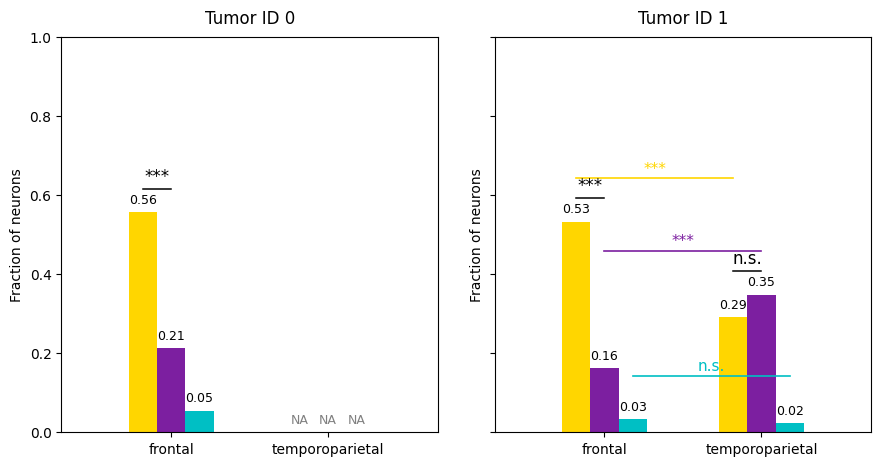


Ratios used for chi-square significance tests (prod vs sens within each condition):
Tumor 0, frontal: prod = 507/911 = 0.5565, sens = 194/911 = 0.2130, both = 50/911 = 0.0549, p (prod vs sens) = 5.163e-51
Tumor 0, temporoparietal: prod = NA, sens = NA, both = NA, p (prod vs sens) = nan
Tumor 1, frontal: prod = 395/741 = 0.5331, sens = 120/741 = 0.1619, both = 24/741 = 0.0324, p (prod vs sens) = 1.626e-50
Tumor 1, temporoparietal: prod = 26/89 = 0.2921, sens = 31/89 = 0.3483, both = 2/89 = 0.0225, p (prod vs sens) = 0.5205

Ratios used for chi-square significance tests (frontal vs temporoparietal for each bar type):
Tumor 0, prod: frontal = 507/911 = 0.5565, temporoparietal = NA, p = nan
Tumor 0, sens: frontal = 194/911 = 0.2130, temporoparietal = NA, p = nan
Tumor 0, both: frontal = 50/911 = 0.0549, temporoparietal = NA, p = nan
Tumor 1, prod: frontal = 395/741 = 0.5331, temporoparietal = 26/89 = 0.2921, p = 2.871e-05
Tumor 1, sens: frontal = 120/741 = 0.1619, temporoparietal = 31/89 

In [33]:
# isualize cross-insertion results
# this cell is visualizing and calculating stats treating each inseration as single cohort
### i.e. single ratio for each condition and chi-square for stats
print(prod_neuron_ct_list)
print(sens_neuron_ct_list)
print(total_neuron_ct_list)
print(insertion_ids)
print(tumor_id_list)

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Convert lists to numpy arrays for easier indexing
prod_neuron_ct_arr = np.array(prod_neuron_ct_list)
sens_neuron_ct_arr = np.array(sens_neuron_ct_list)
both_neuron_ct_arr = np.array(both_neuron_ct_list)
total_neuron_ct_arr = np.array(total_neuron_ct_list)
insertion_id_arr = np.array(insertion_id_list)
tumor_id_arr = np.array(tumor_id_list)

# Set up plot with reduced whitespace
fig, axes = plt.subplots(1, 2, figsize=(9, 5), sharey=True, gridspec_kw={'wspace': 0.15, 'left': 0.08, 'right': 0.98, 'bottom': 0.13, 'top': 0.92})
tumor_labels = {0: "Tumor ID 0", 1: "Tumor ID 1"}
insertion_labels = {0: "frontal", 1: "temporoparietal"}

# Pick a new, darker, prettier yellow and purple, and a nice aqua
prod_color = "#FFD600"   # vivid yellow
sens_color = "#7C1FA0"   # deep purple
both_color = "#00BFC4"   # aqua

# Store ratios for printing
ratios_for_chisq = []
ratios_for_frontal_vs_temp = []

# Always show both insertions for both tumor IDs, even if one is missing
all_insertion_ids = [0, 1]

# To ensure both plots have the same x-limits, always plot both bars for both tumor IDs
for idx, tumor_id in enumerate([0, 1]):
    ax = axes[idx]
    # Calculate values for each insertion
    bar_vals = []
    pvals_prod_vs_sens = []
    for ins_id in all_insertion_ids:
        mask = (tumor_id_arr == tumor_id) & (insertion_id_arr == ins_id)
        total_prod = np.sum(prod_neuron_ct_arr[mask])
        total_sens = np.sum(sens_neuron_ct_arr[mask])
        total_both = np.sum(both_neuron_ct_arr[mask])
        total_neurons = np.sum(total_neuron_ct_arr[mask])
        # Avoid division by zero
        frac_prod = total_prod / total_neurons if total_neurons > 0 else np.nan
        frac_sens = total_sens / total_neurons if total_neurons > 0 else np.nan
        frac_both = total_both / total_neurons if total_neurons > 0 else np.nan
        bar_vals.append((frac_prod, frac_sens, frac_both, total_prod, total_sens, total_both, total_neurons))
        # Chi-square: prod vs sens within this condition
        not_prod = total_neurons - total_prod
        not_sens = total_neurons - total_sens
        table = np.array([
            [total_prod, not_prod],
            [total_sens, not_sens]
        ])
        if total_neurons > 0:
            try:
                chi2, p, _, _ = stats.chi2_contingency(table)
            except Exception:
                p = np.nan
        else:
            p = np.nan
        pvals_prod_vs_sens.append(p)
        ratios_for_chisq.append({
            "tumor_id": tumor_id,
            "insertion_id": ins_id,
            "prod": f"{total_prod}/{total_neurons} = {frac_prod:.4f}" if total_neurons > 0 else "NA",
            "sens": f"{total_sens}/{total_neurons} = {frac_sens:.4f}" if total_neurons > 0 else "NA",
            "both": f"{total_both}/{total_neurons} = {frac_both:.4f}" if total_neurons > 0 else "NA",
            "pval_prod_vs_sens": p
        })
    # Bar positions: 0 = frontal, 1 = temporoparietal
    x = np.arange(2)
    width = 0.18

    # Plot frontal
    ax.bar(x[0] - width, bar_vals[0][0] if not np.isnan(bar_vals[0][0]) else 0, width, color=prod_color)
    ax.bar(x[0],         bar_vals[0][1] if not np.isnan(bar_vals[0][1]) else 0, width, color=sens_color)
    ax.bar(x[0] + width, bar_vals[0][2] if not np.isnan(bar_vals[0][2]) else 0, width, color=both_color)
    # Plot temporoparietal
    ax.bar(x[1] - width, bar_vals[1][0] if not np.isnan(bar_vals[1][0]) else 0, width, color=prod_color)
    ax.bar(x[1],         bar_vals[1][1] if not np.isnan(bar_vals[1][1]) else 0, width, color=sens_color)
    ax.bar(x[1] + width, bar_vals[1][2] if not np.isnan(bar_vals[1][2]) else 0, width, color=both_color)

    # Set x-ticks and labels
    ax.set_xticks(x)
    ax.set_xticklabels([insertion_labels[0], insertion_labels[1]])
    ax.set_ylim(0, 1)
    ax.set_ylabel('Fraction of neurons')
    ax.set_title(tumor_labels[tumor_id], pad=10)

    # Annotate bars with values
    for i, (frac_prod, frac_sens, frac_both, _, _, _, total_neurons) in enumerate(bar_vals):
        if not np.isnan(frac_prod) and total_neurons > 0:
            ax.text(x[i] - width, frac_prod + 0.015, f"{frac_prod:.2f}", ha='center', va='bottom', fontsize=9)
        if not np.isnan(frac_sens) and total_neurons > 0:
            ax.text(x[i], frac_sens + 0.015, f"{frac_sens:.2f}", ha='center', va='bottom', fontsize=9)
        if not np.isnan(frac_both) and total_neurons > 0:
            ax.text(x[i] + width, frac_both + 0.015, f"{frac_both:.2f}", ha='center', va='bottom', fontsize=9)
        if total_neurons == 0:
            ax.text(x[i] - width, 0.015, "NA", ha='center', va='bottom', fontsize=9, color='gray')
            ax.text(x[i], 0.015, "NA", ha='center', va='bottom', fontsize=9, color='gray')
            ax.text(x[i] + width, 0.015, "NA", ha='center', va='bottom', fontsize=9, color='gray')

    # --- Chi-square tests and significance bars ---
    def significance_text(p):
        if p is None or np.isnan(p):
            return 'n/a'
        if p < 0.001:
            return '***'
        elif p < 0.01:
            return '**'
        elif p < 0.05:
            return '*'
        else:
            return 'n.s.'

    # For prod vs sens within each condition
    # Frontal (insertion 0)
    y_max_frontal = np.nanmax([bar_vals[0][0] if not np.isnan(bar_vals[0][0]) else 0, bar_vals[0][1] if not np.isnan(bar_vals[0][1]) else 0])
    y_sig_frontal = y_max_frontal + 0.06
    if not (np.isnan(bar_vals[0][0]) or np.isnan(bar_vals[0][1])) and bar_vals[0][6] > 0:
        ax.plot([x[0] - width, x[0]], [y_sig_frontal, y_sig_frontal], color='k', linewidth=1.1)
        ax.text(x[0] - width/2, y_sig_frontal + 0.008, significance_text(pvals_prod_vs_sens[0]),
                ha='center', va='bottom', fontsize=12)
    # Temporoparietal (insertion 1)
    y_max_temp = np.nanmax([bar_vals[1][0] if not np.isnan(bar_vals[1][0]) else 0, bar_vals[1][1] if not np.isnan(bar_vals[1][1]) else 0])
    y_sig_temp = y_max_temp + 0.06
    if not (np.isnan(bar_vals[1][0]) or np.isnan(bar_vals[1][1])) and bar_vals[1][6] > 0:
        ax.plot([x[1] - width, x[1]], [y_sig_temp, y_sig_temp], color='k', linewidth=1.1)
        ax.text(x[1] - width/2, y_sig_temp + 0.008, significance_text(pvals_prod_vs_sens[1]),
                ha='center', va='bottom', fontsize=12)

    # --- Chi-square test between frontal and temporoparietal for each bar type ---
    # Only if both have data
    for bar_type, idx_offset, color, label in zip(
        ['prod', 'sens', 'both'],
        [-width, 0, width],
        [prod_color, sens_color, both_color],
        ['prod', 'sens', 'both']
    ):
        # Get counts for frontal and temporoparietal
        if bar_type == 'prod':
            count0 = bar_vals[0][3]
            count1 = bar_vals[1][3]
        elif bar_type == 'sens':
            count0 = bar_vals[0][4]
            count1 = bar_vals[1][4]
        elif bar_type == 'both':
            count0 = bar_vals[0][5]
            count1 = bar_vals[1][5]
        total0 = bar_vals[0][6]
        total1 = bar_vals[1][6]
        not_count0 = total0 - count0
        not_count1 = total1 - count1
        if total0 > 0 and total1 > 0:
            table = np.array([
                [count0, not_count0],
                [count1, not_count1]
            ])
            try:
                chi2, p, _, _ = stats.chi2_contingency(table)
            except Exception:
                p = np.nan
        else:
            p = np.nan
        ratios_for_frontal_vs_temp.append({
            "tumor_id": tumor_id,
            "bar_type": bar_type,
            "frontal": f"{count0}/{total0} = {count0/total0:.4f}" if total0 > 0 else "NA",
            "temporoparietal": f"{count1}/{total1} = {count1/total1:.4f}" if total1 > 0 else "NA",
            "pval": p
        })
        # Draw significance bar between frontal and temporoparietal for this bar type
        y0 = bar_vals[0][['prod', 'sens', 'both'].index(bar_type)]
        y1 = bar_vals[1][['prod', 'sens', 'both'].index(bar_type)]
        y_max = np.nanmax([y0 if not np.isnan(y0) else 0, y1 if not np.isnan(y1) else 0])
        y_sig = y_max + 0.11
        if total0 > 0 and total1 > 0:
            ax.plot([x[0] + idx_offset, x[1] + idx_offset], [y_sig, y_sig], color=color, linewidth=1.2)
            ax.text((x[0] + x[1]) / 2 + idx_offset, y_sig + 0.006, significance_text(p),
                    ha='center', va='bottom', fontsize=11, color=color)

    # Set x-limits to always show both conditions, even if one is missing
    ax.set_xlim(-0.7, 1.7)

plt.tight_layout(pad=1.0)
plt.subplots_adjust(left=0.08, right=0.98, bottom=0.13, top=0.92, wspace=0.15)
plt.show()

# Print out the ratios used for all the chi square significance tests
print("\nRatios used for chi-square significance tests (prod vs sens within each condition):")
for entry in ratios_for_chisq:
    print(f"Tumor {entry['tumor_id']}, {insertion_labels[entry['insertion_id']]}: prod = {entry['prod']}, sens = {entry['sens']}, both = {entry['both']}, p (prod vs sens) = {entry['pval_prod_vs_sens']:.4g}")

print("\nRatios used for chi-square significance tests (frontal vs temporoparietal for each bar type):")
for entry in ratios_for_frontal_vs_temp:
    print(f"Tumor {entry['tumor_id']}, {entry['bar_type']}: frontal = {entry['frontal']}, temporoparietal = {entry['temporoparietal']}, p = {entry['pval']:.4g}")

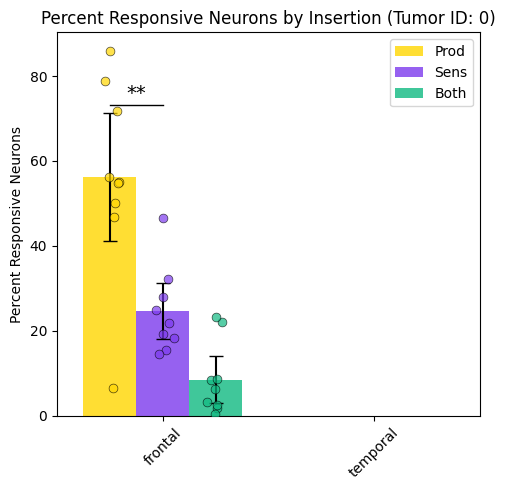

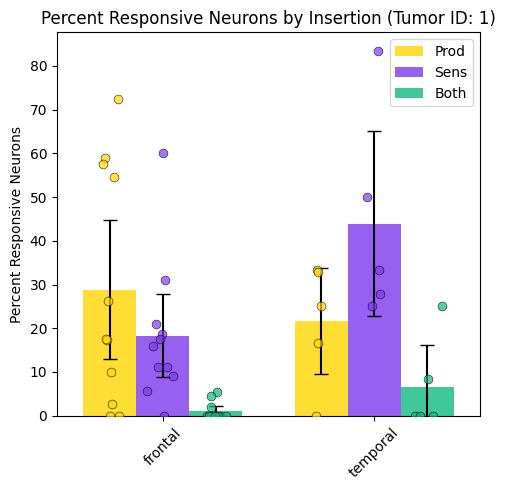

In [34]:

# visualize cross-insertion results
# this cell is visualizing and calculating stats treating each inseration separately
### i.e. each insertion contributes a ratio and ttest cross insertion for results
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

prod_neuron_perc_arr = np.array(prod_neuron_perc_list)
sens_neuron_perc_arr = np.array(sens_neuron_perc_list)
both_neuron_perc_arr = np.array(both_neuron_perc_list)
insertion_id_arr = np.array(insertion_id_list)
tumor_id_arr = np.array(tumor_id_list)

unique_tumor_ids = np.unique(tumor_id_arr)

for tumor_id in unique_tumor_ids:
    mask_tumor = tumor_id_arr == tumor_id
    insertions_in_tumor = np.unique(insertion_id_arr[mask_tumor])

    avg_prod_perc = []
    avg_sens_perc = []
    avg_both_perc = []
    ci95_prod_perc = []
    ci95_sens_perc = []
    ci95_both_perc = []
    insertion_labels = []
    p_values = []
    prod_vals_list = []
    sens_vals_list = []
    both_vals_list = []

    # Always process both frontal (0) and temporal (1) insertions for consistency
    all_insertion_ids = [0, 1]  # frontal and temporal
    
    for ins_id in all_insertion_ids:
        mask_ins = (insertion_id_arr == ins_id) & mask_tumor
        prod_vals = prod_neuron_perc_arr[mask_ins]
        sens_vals = sens_neuron_perc_arr[mask_ins]
        both_vals = both_neuron_perc_arr[mask_ins]
        prod_vals_list.append(prod_vals)
        sens_vals_list.append(sens_vals)
        both_vals_list.append(both_vals)
        if len(prod_vals) > 0 and len(sens_vals) > 0 and len(both_vals) > 0:
            # Means
            avg_prod_perc.append(np.mean(prod_vals))
            avg_sens_perc.append(np.mean(sens_vals))
            avg_both_perc.append(np.mean(both_vals))
            # 95% confidence intervals
            def ci95(arr):
                if len(arr) < 2:
                    return 0.0
                sem = stats.sem(arr)
                return 1.96 * sem
            ci95_prod_perc.append(ci95(prod_vals))
            ci95_sens_perc.append(ci95(sens_vals))
            ci95_both_perc.append(ci95(both_vals))
            # Map 0 to "frontal", 1 to "temporal"
            if ins_id == 0:
                insertion_labels.append("frontal")
            elif ins_id == 1:
                insertion_labels.append("temporal")
            # Unpaired t-test only (no paired t-test)
            t_stat, p_val = stats.ttest_ind(prod_vals, sens_vals, equal_var=False)
            p_values.append(p_val)
        else:
            # If no data, append NaN for plotting
            avg_prod_perc.append(np.nan)
            avg_sens_perc.append(np.nan)
            avg_both_perc.append(np.nan)
            ci95_prod_perc.append(np.nan)
            ci95_sens_perc.append(np.nan)
            ci95_both_perc.append(np.nan)
            # Map 0 to "frontal", 1 to "temporal"
            if ins_id == 0:
                insertion_labels.append("frontal")
            elif ins_id == 1:
                insertion_labels.append("temporal")
            p_values.append(np.nan)

    # Always use 2 positions for consistent spacing (frontal and temporal)
    x = np.arange(2)  # Always [0, 1] for frontal and temporal
    width = 0.25  # Reduced width to accommodate three bars

    # Define custom colors
    prod_color = "#FFD600"   # a nice yellow
    sens_color = "#7C3AED"   # a nice purple
    both_color = "#10B981"   # a nice green

    fig, ax = plt.subplots(figsize=(5, 5))  # Slightly wider to accommodate three bars
    
    # Plot bars, handling cases where some positions might have NaN values
    rects1 = ax.bar(x - width, avg_prod_perc, width, yerr=ci95_prod_perc, label='Prod', color=prod_color, alpha=0.8, capsize=5)
    rects2 = ax.bar(x, avg_sens_perc, width, yerr=ci95_sens_perc, label='Sens', color=sens_color, alpha=0.8, capsize=5)
    rects3 = ax.bar(x + width, avg_both_perc, width, yerr=ci95_both_perc, label='Both', color=both_color, alpha=0.8, capsize=5)

    # Plot individual data points on top of bars
    for i, (prod_vals, sens_vals, both_vals) in enumerate(zip(prod_vals_list, sens_vals_list, both_vals_list)):
        # Jitter for visibility
        jitter_strength = 0.03  # reduced slightly for three bars
        # Plot prod points
        if len(prod_vals) > 0:
            x_jittered = np.random.normal(loc=x[i] - width, scale=jitter_strength, size=len(prod_vals))
            ax.scatter(x_jittered, prod_vals, color=prod_color, alpha=0.7, s=40, edgecolor='k', linewidth=0.5, zorder=3)
        # Plot sens points
        if len(sens_vals) > 0:
            x_jittered = np.random.normal(loc=x[i], scale=jitter_strength, size=len(sens_vals))
            ax.scatter(x_jittered, sens_vals, color=sens_color, alpha=0.7, s=40, edgecolor='k', linewidth=0.5, zorder=3)
        # Plot both points
        if len(both_vals) > 0:
            x_jittered = np.random.normal(loc=x[i] + width, scale=jitter_strength, size=len(both_vals))
            ax.scatter(x_jittered, both_vals, color=both_color, alpha=0.7, s=40, edgecolor='k', linewidth=0.5, zorder=3)

    # Add significance stars
    for i, p in enumerate(p_values):
        if np.isnan(p):
            continue
        # Only annotate if p < 0.05
        if p < 0.001:
            star = '***'
        elif p < 0.01:
            star = '**'
        elif p < 0.05:
            star = '*'
        else:
            star = ''
        if star:
            # Find the top of the Prod and Sens bars only (since significance is comparing these two)
            y_max = max(
                avg_prod_perc[i] + (ci95_prod_perc[i] if not np.isnan(ci95_prod_perc[i]) else 0),
                avg_sens_perc[i] + (ci95_sens_perc[i] if not np.isnan(ci95_sens_perc[i]) else 0)
            )
            y = y_max + 2  # add a little space above the bar
            ax.plot([x[i] - width, x[i]], [y, y], color='k', linewidth=1)  # Only span Prod and Sens bars
            ax.text(x[i] - width/2, y + 0.5, star, ha='center', va='bottom', color='k', fontsize=14)

    ax.set_ylabel('Percent Responsive Neurons')
    ax.set_title(f'Percent Responsive Neurons by Insertion (Tumor ID: {tumor_id})')
    ax.set_xticks(x)
    ax.set_xticklabels(insertion_labels, rotation=45)
    
    # Set x-axis limits to ensure equal spacing on both sides
    ax.set_xlim(-0.5, 1.5)  # This centers the bars with equal spacing
    
    # Set y-axis minimum to 0 and move legend to top right
    ax.set_ylim(bottom=0)
    ax.legend(loc='upper right')
    plt.tight_layout()
    plt.show()


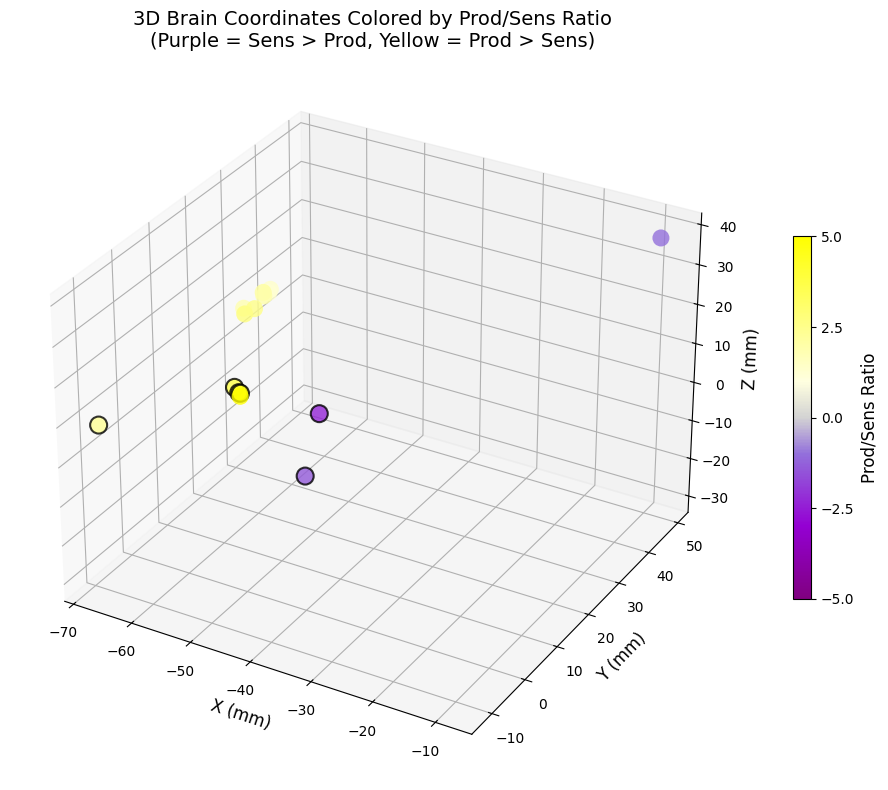

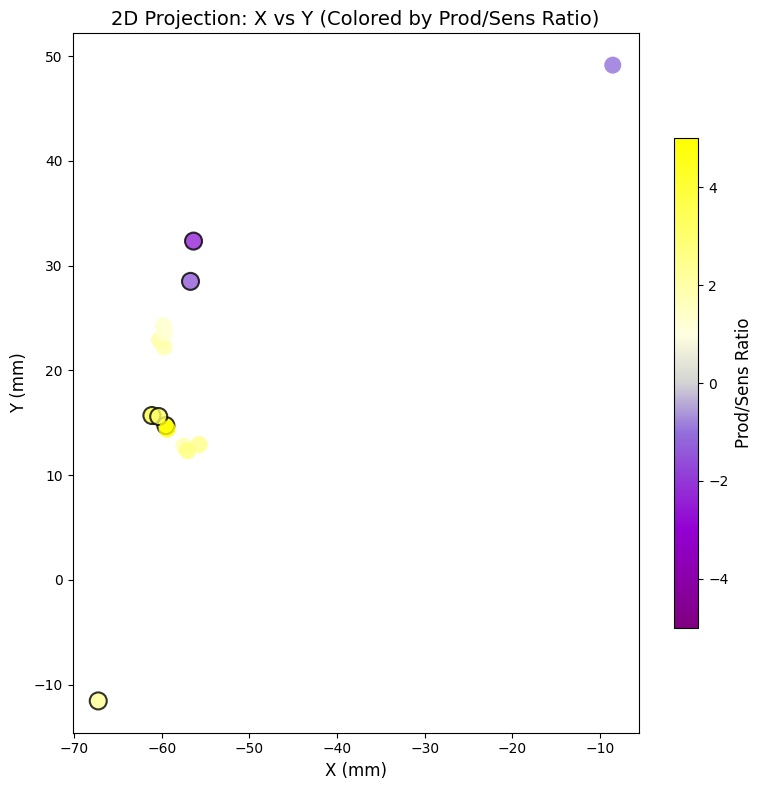

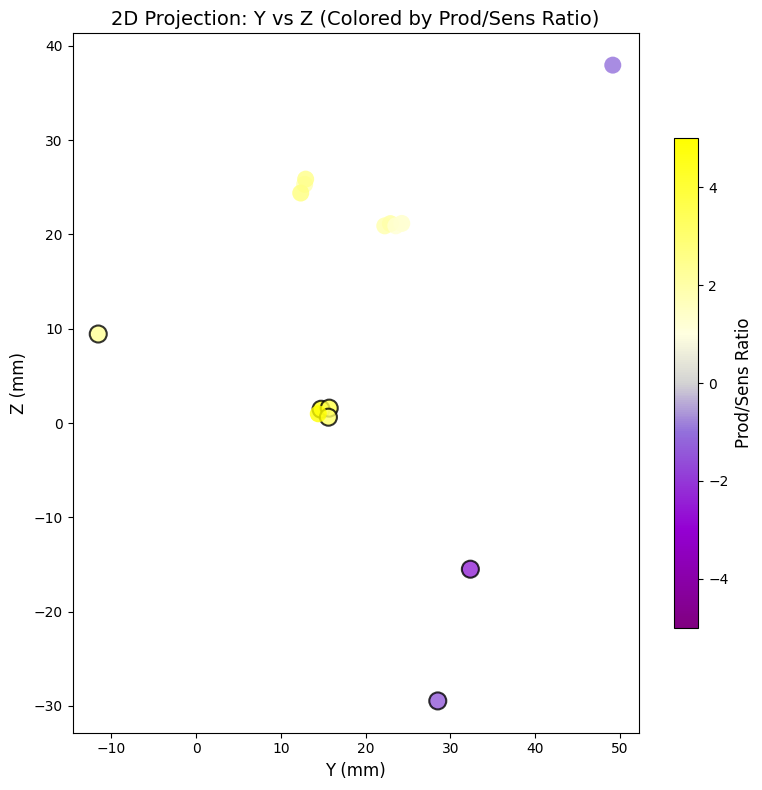

🎯 3D Plot + 2D Projections with Black Borders for NP113, NP128, NP147!
📈 Ratio range: -5 to +5
📊 Actual ratio range in data: -2.33 to 5.67


In [5]:
# Modified 3D plot with black borders for NP113, NP128, NP147
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Coordinates for each point (15 total)
coordinates = np.array([
    [-60.468, 14.833, 1.176], [-60.468, 14.833, 1.176], [-60.468, 14.833, 1.176], # NP113
    [-56.996, 12.784, 25.096], [-56.996, 12.784, 25.096], [-56.996, 12.784, 25.096], # NP119
    [-56.051, 28.847, -29.454], [-56.574, 32.887, -14.714], # NP128
    [-59.802, 22.893, 21.025], [-59.802, 22.893, 21.025], [-59.802, 22.893, 21.025], [-59.802, 22.893, 21.025], # NP134
    [-66.622, -12.066, 9.239], # NP147
    [-9.379, 50.902, 38.954], # NP148
    [-59.023, 13.631, 2.084], # NP149
])

# Get the prod and sens percentages from the analysis
prod_percentages = np.array(prod_neuron_perc_list)
sens_percentages = np.array(sens_neuron_perc_list)

# Calculate symmetric prod/sens ratios for each point
prod_sens_ratios = []
for prod_pct, sens_pct in zip(prod_percentages, sens_percentages):
    # Avoid division by zero
    prod_safe = prod_pct if prod_pct != 0 else 0.1
    sens_safe = sens_pct if sens_pct != 0 else 0.1
    # Symmetric ratio: positive if prod > sens, negative if sens > prod
    if prod_safe > sens_safe:
        ratio = prod_safe / sens_safe
    else:
        ratio = -sens_safe / prod_safe
    prod_sens_ratios.append(ratio)
prod_sens_ratios = np.array(prod_sens_ratios)

# Create color mapping centered at zero: purple (negative) -> grey (zero) -> yellow (positive)
min_ratio = -5
max_ratio = 5
normalized_ratios = (prod_sens_ratios - min_ratio) / (max_ratio - min_ratio)
normalized_ratios = np.clip(normalized_ratios, 0, 1)

colors_list = ['purple', 'darkviolet', 'mediumpurple', 'lightgrey', 'lightyellow', 'yellow']
positions = [0, 0.2, 0.4, 0.5, 0.6, 1.0]
cmap = mcolors.LinearSegmentedColormap.from_list('purple_grey_yellow', 
                                                 list(zip(positions, colors_list)), N=256)
point_colors = cmap(normalized_ratios)

# --- 3D Plot (X, Y, Z) with Z as vertical axis ---
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Add jitter to overlapping points for visualization
jitter_strength = 0.5
jittered_coords = coordinates + np.random.normal(0, jitter_strength, coordinates.shape)

# Create edge colors for specific subjects (NP113, NP128, NP147)
edge_colors = ['black' if i in [0,1,2,6,7,12] else 'none' for i in range(len(coordinates))]
edge_widths = [1.5 if i in [0,1,2,6,7,12] else 0 for i in range(len(coordinates))]

# Plot: X (horizontal), Y (horizontal), Z (vertical)
ax.scatter(jittered_coords[:, 0], jittered_coords[:, 1], jittered_coords[:, 2],
           c=point_colors, marker='o', s=150, alpha=0.8,
           edgecolors=edge_colors, linewidths=edge_widths)

ax.set_xlabel('X (mm)', fontsize=12)
ax.set_ylabel('Y (mm)', fontsize=12)
ax.set_zlabel('Z (mm)', fontsize=12)
ax.set_title('3D Brain Coordinates Colored by Prod/Sens Ratio\n(Purple = Sens > Prod, Yellow = Prod > Sens)', fontsize=14)

# Add colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=min_ratio, vmax=max_ratio))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, shrink=0.5, aspect=20)
cbar.set_label('Prod/Sens Ratio', fontsize=12)
cbar.set_ticks([-5, -2.5, 0, 2.5, 5])

plt.tight_layout()
plt.show()

# --- 2D Projection: X vs Y ---
fig2, ax2 = plt.subplots(figsize=(8, 8))
ax2.scatter(jittered_coords[:, 0], jittered_coords[:, 1], c=point_colors, s=150, alpha=0.8,
           edgecolors=edge_colors, linewidths=edge_widths)
ax2.set_xlabel('X (mm)', fontsize=12)
ax2.set_ylabel('Y (mm)', fontsize=12)
ax2.set_title('2D Projection: X vs Y (Colored by Prod/Sens Ratio)', fontsize=14)
cbar2 = plt.colorbar(sm, ax=ax2, shrink=0.7)
cbar2.set_label('Prod/Sens Ratio', fontsize=12)
plt.tight_layout()
plt.show()

# --- 2D Projection: Y vs Z ---
fig3, ax3 = plt.subplots(figsize=(8, 8))
ax3.scatter(jittered_coords[:, 1], jittered_coords[:, 2], c=point_colors, s=150, alpha=0.8,
           edgecolors=edge_colors, linewidths=edge_widths)
ax3.set_xlabel('Y (mm)', fontsize=12)
ax3.set_ylabel('Z (mm)', fontsize=12)
ax3.set_title('2D Projection: Y vs Z (Colored by Prod/Sens Ratio)', fontsize=14)
cbar3 = plt.colorbar(sm, ax=ax3, shrink=0.7)
cbar3.set_label('Prod/Sens Ratio', fontsize=12)
plt.tight_layout()
plt.show()

print("🎯 3D Plot + 2D Projections with Black Borders for NP113, NP128, NP147!")
print("📈 Ratio range: -5 to +5")
print(f"📊 Actual ratio range in data: {np.min(prod_sens_ratios):.2f} to {np.max(prod_sens_ratios):.2f}")
